# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

## Importamos librerias

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Cargamos los datos

In [9]:
# Leemos el archivo
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
# Pasamos el campo temperatura de decimas a unidades
df['Data_Value'] = df['Data_Value'] / 10

## 2005 - 2014
Filtramos el periodo desde 2005 hasta 2014

In [10]:
# Filtramos las fechas 
df_2005_2014 = df[(df['Date']>='2005-01-01') & (df['Date']<='2014-12-31')]
# Ordenamos el dataset por fecha
df_2005_2014 = df_2005_2014.sort_values('Date')

# Convertimos a datetime la columna Date
df_2005_2014['Date'] = pd.to_datetime(df_2005_2014['Date'])

# Generamos el "day of the year" value 
df_2005_2014['Date_Of_Year']=df_2005_2014['Date'].dt.strftime("%j")

# TMAX: Capturamos la máxima temperatura agrupada por date_of_year
df_TMAX_2005_2014 = df_2005_2014[df_2005_2014['Element'] =='TMAX'][['Data_Value', 'Date_Of_Year']]
TMAX_2005_2014 = df_TMAX_2005_2014.groupby('Date_Of_Year').max()

# TMIN : Capturamos la mínima temperatura agrupada por date_of_year
df_TMIN_2005_2014 = df_2005_2014[df_2005_2014['Element'] == 'TMIN'][['Data_Value', 'Date_Of_Year']]
TMIN_2005_2014 = df_TMIN_2005_2014.groupby('Date_Of_Year').min()

## Dado que 2005_2014 tienen el 29 de febrero, y 2015 no tienen, 
## lo eliminamos del primer dataset para no tener problemas en la visualización. Eliminamos el dia 60
# Dropeamos el 29 de febrero para poder comparar estos datos con los del 2005
TMAX_2005_2014.drop('060', inplace = True)
TMIN_2005_2014.drop('060', inplace = True)

TMAX_2005_2014_list = TMAX_2005_2014['Data_Value'].tolist()
TMIN_2005_2014_list = TMIN_2005_2014['Data_Value'].tolist()

# Nos quedamos con los días de la semana para poder graficar
day_of_year =TMIN_2005_2014.index

## 2015
Filtramos el periodo 2015

In [11]:
# Filtramos las fechas para quedarnos el año 2015
df_2015 = df[df['Date']>='2015-01-01']
# Ordenamos el dataset por fecha
df_2015 = df_2015.sort_values('Date')

# Convertimos a datetime la columna Date
df_2015['Date'] = pd.to_datetime(df_2015['Date'])

# Generamos el "day of the year" value 
df_2015['Date_Of_Year']=df_2015['Date'].dt.strftime("%j")

# TMAX: Capturamos la máxima temperatura agrupada por date_of_year
df_TMAX_2015 = df_2015[df_2015['Element'] =='TMAX'][['Data_Value', 'Date_Of_Year']]
TMAX_2015 = df_TMAX_2015.groupby('Date_Of_Year').max()

# TMIN : Capturamos la mínima temperatura agrupada por date_of_year
df_TMIN_2015 = df_2015[df_2015['Element'] == 'TMIN'][['Data_Value', 'Date_Of_Year']]
TMIN_2015 = df_TMIN_2015.groupby('Date_Of_Year').min()

In [12]:
# Comparamos TMAX_2015 con TMAX_2005_2014 nos quedamos con los casos donde TMAX_2015 es mayor
TMAX_2005_2014.rename(columns ={'Data_Value':'2005_2014'}, inplace = True)
TMAX_2015.rename(columns ={'Data_Value':'2015'}, inplace = True)
TMAX_2015 = TMAX_2015.join(TMAX_2005_2014)
TMAX_2015['flag'] = np.where(TMAX_2015['2015']>TMAX_2015['2005_2014'], 1, 0)
TMAX_2015= TMAX_2015[TMAX_2015['flag']==1]
# Capturamos los indices
day_of_year_2015_max = TMAX_2015.index
#Convertimos a lista los puntos con los que queremos hacer el overlap
TMAX_2015_list = TMAX_2015['2015'].tolist()

In [13]:
# Comparamos TMIN_2015 con TMIN_2005_2014 nos quedamos con los casos donde TMIN_2015 es menor
TMIN_2005_2014.rename(columns ={'Data_Value':'2005_2014'}, inplace = True)
TMIN_2015.rename(columns ={'Data_Value':'2015'}, inplace = True)
TMIN_2015 = TMIN_2015.join(TMIN_2005_2014)
TMIN_2015['flag'] = np.where(TMIN_2015['2015']<TMIN_2015['2005_2014'], 1, 0)
TMIN_2015= TMIN_2015[TMIN_2015['flag']==1]
# Capturamos los indices
day_of_year_2015_min = TMIN_2015.index
#Convertimos a lista los puntos con los que queremos hacer el overlap
TMIN_2015_list = TMIN_2015['2015'].tolist()

## Graficamos

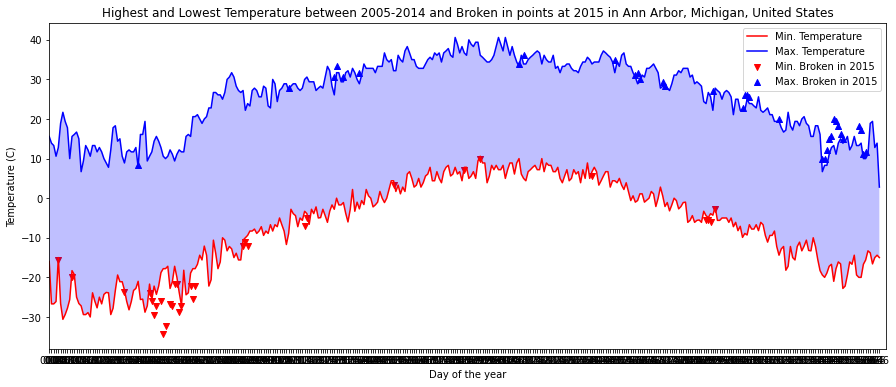

In [30]:
# Creamos visualizaciones de las temperaturas máximas y mínimas
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(day_of_year, TMIN_2005_2014_list, 'r', label='Min. Temperature')
plt.plot(day_of_year, TMAX_2005_2014_list, 'b', label = 'Max. Temperature')
plt.scatter(day_of_year_2015_min,TMIN_2015_list,  c ='r', marker='v', label = 'Min. Broken in 2015')
plt.scatter(day_of_year_2015_max,TMAX_2015_list,  c ='b',  marker='^',label = 'Max. Broken in 2015')

plt.xlabel('Day of the year')
plt.ylabel('Temperature (C)')
plt.title('Highest and Lowest Temperature between 2005-2014 and Broken in points at 2015 in Ann Arbor, Michigan, United States')
plt.legend()
plt.xlim(0, 367)
plt.fill_between(range(len(day_of_year)), TMIN_2005_2014_list, TMAX_2005_2014_list, facecolor = 'blue', alpha= 0.25)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')